In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [77]:
# read dataframe
df = pd.read_csv("adsb-attacks.csv")
print (df.columns.tolist())
df.head()

['id', 'airlineId', 'callsign', 'flightNumber', 'transponderCode', 'heading', 'longitude', 'latitude', 'altitude', 'speed', 'groundSpeed', 'groundTrack', 'takeOffTime', 'trueAirSpeed', 'radial', 'distance', 'origin', 'destination', 'taxi_start', 'attackType']


,id,airlineId,callsign,flightNumber,transponderCode,heading,longitude,latitude,altitude,speed,groundSpeed,groundTrack,takeOffTime,trueAirSpeed,radial,distance,origin,destination,taxi_start,attackType
0,aircraft-1210,asa,ASA83,83,5527,5.028252,-121.637281,47.130219,15000.0,320.0,405.524540,-1.235791,0.0,396.80,1.902720,61.933732,NaN,ksea,0,No attack
1,aircraft-1214,aal,AAL8037,8037,6021,5.035964,-121.101352,46.881588,19000.0,320.0,426.607700,-1.228065,0.0,417.28,1.898366,110.802077,NaN,ksea,0,No attack
2,aircraft-1218,skw,SKW4478,4478,525,5.042546,-120.695952,46.690211,19000.0,320.0,426.660112,-1.221628,0.0,417.28,1.899028,147.977523,NaN,ksea,0,No attack
3,aircraft-1222,asa,ASA76,76,341,5.125558,-120.269613,46.471277,21000.0,320.0,437.818196,-1.140440,0.0,427.52,1.908014,188.201608,NaN,ksea,0,No attack
4,aircraft-1226,asa,ASA325,325,6566,5.125558,-119.963795,46.297008,30000.0,320.0,485.212861,-1.140141,0.0,473.60,1.919551,218.180456,NaN,ksea,0,No attack


In [78]:
# extract attack list
attk_list = df['attackType'].unique().tolist()
attk_list

['No attack',
 'Non-responsive aircraft',
 'Jumping aircraft',
 'Aircraft displaying false information',
 'Aircraft standing still',
 'Trajectory modification',
 'Transponder code alteration',
 'Aircraft spoofing',
 'Ghost injection',
 'Message Delay']

A plot for each attack

Non-responsive aircraft

In [79]:
# nothing to see here
attk = "Non-responsive aircraft"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    print (sub[['id', 'attackType']])
    print ("*********")

                  id attackType
6      aircraft-1234  No attack
40     aircraft-1234  No attack
74     aircraft-1234  No attack
108    aircraft-1234  No attack
142    aircraft-1234  No attack
...              ...        ...
19734  aircraft-1234  No attack
19768  aircraft-1234  No attack
19802  aircraft-1234  No attack
19836  aircraft-1234  No attack
19870  aircraft-1234  No attack

[570 rows x 2 columns]
*********
                  id attackType
9      aircraft-1246  No attack
43     aircraft-1246  No attack
77     aircraft-1246  No attack
111    aircraft-1246  No attack
145    aircraft-1246  No attack
...              ...        ...
19737  aircraft-1246  No attack
19771  aircraft-1246  No attack
19805  aircraft-1246  No attack
19839  aircraft-1246  No attack
19873  aircraft-1246  No attack

[570 rows x 2 columns]
*********
                  id attackType
10     aircraft-1250  No attack
44     aircraft-1250  No attack
78     aircraft-1250  No attack
112    aircraft-1250  No attack
146 

Jumping aircraft

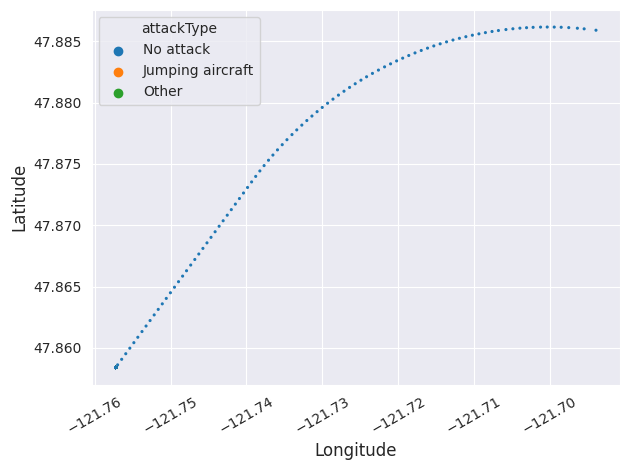

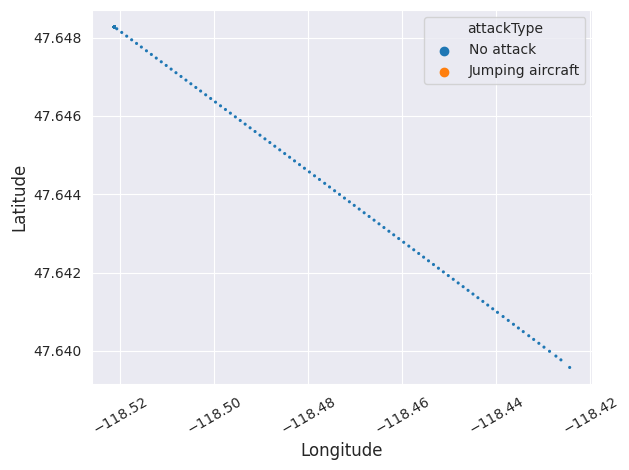

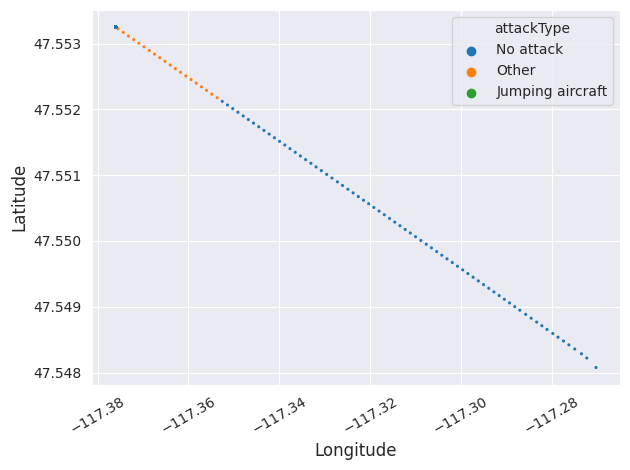

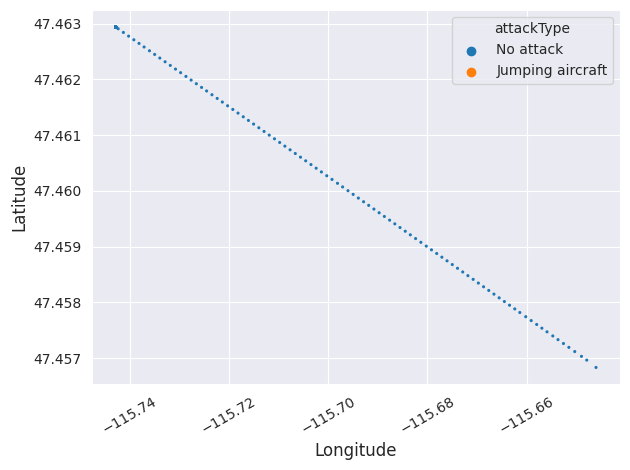

In [80]:
attk = "Jumping aircraft"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    sub = sub.reset_index()
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x="longitude", y="latitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Longitude", fontsize=12)
    p.set_ylabel("Latitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Aircraft displaying false information

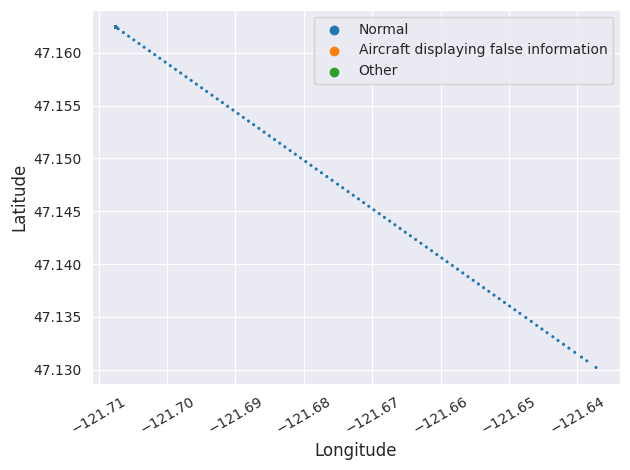

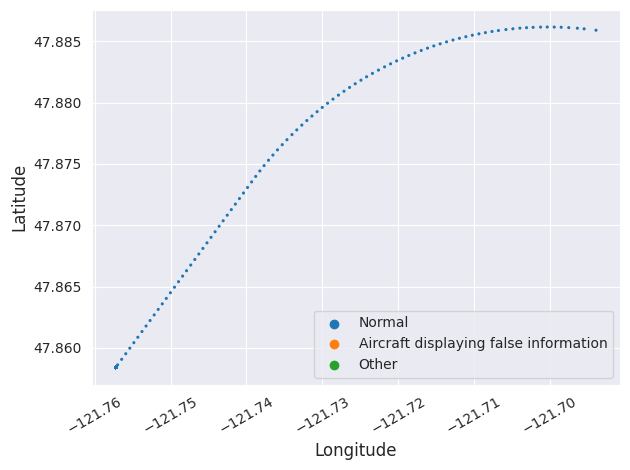

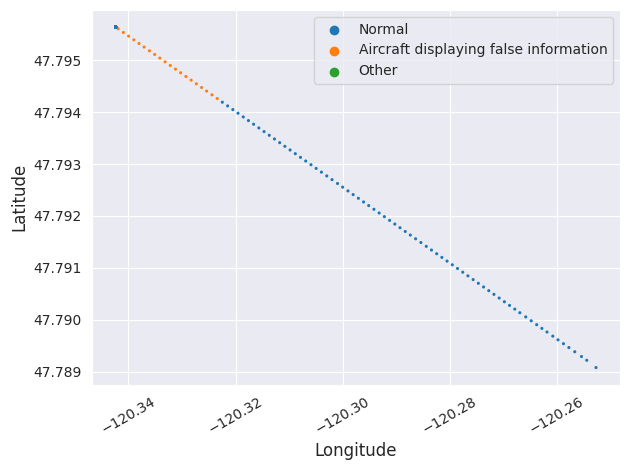

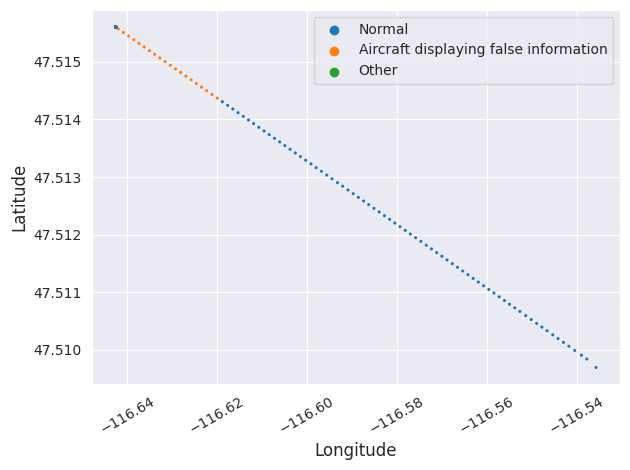

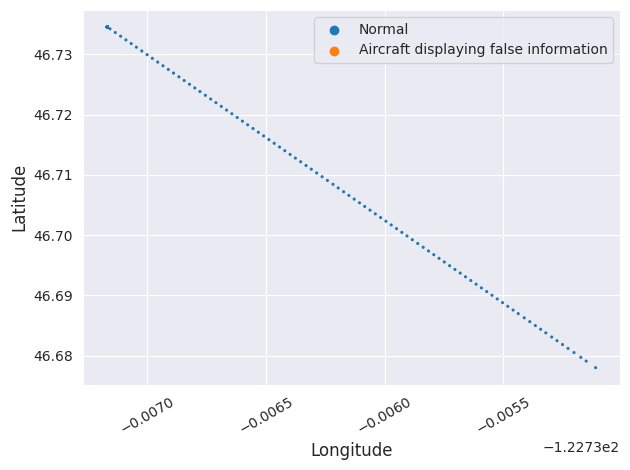

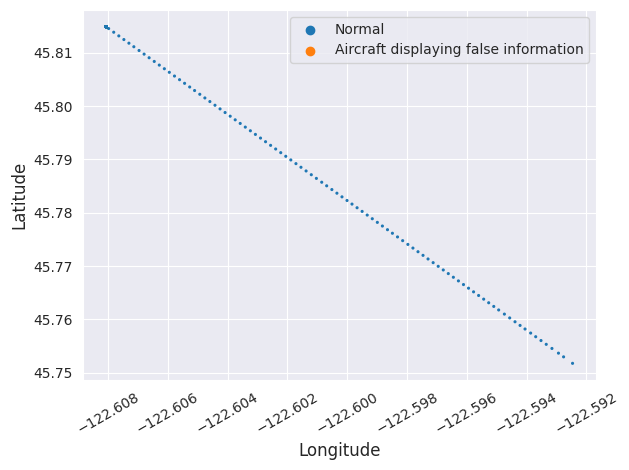

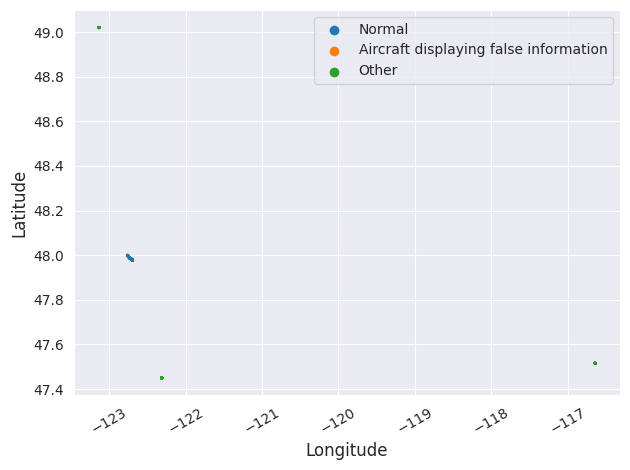

In [81]:
attk = "Aircraft displaying false information"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub = sub.reset_index()
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x="longitude", y="latitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Longitude", fontsize=12)
    p.set_ylabel("Latitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    p.legend(leg_handles, ['Normal', attk, "Other"])
    plt.tight_layout()
    plt.show()

Aircraft standing still

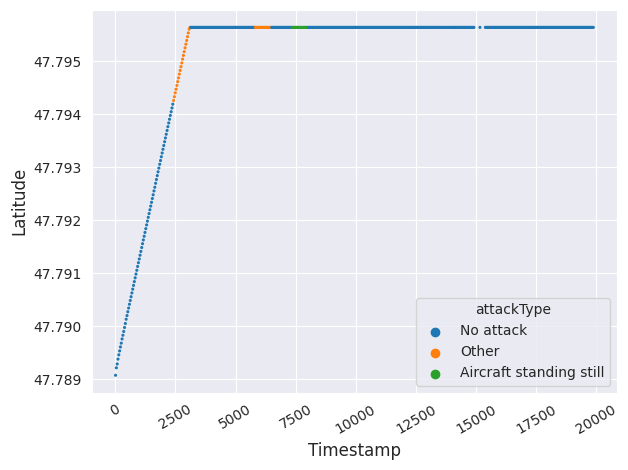

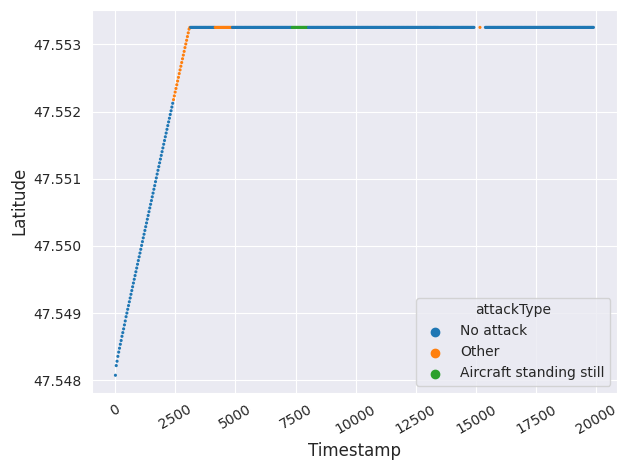

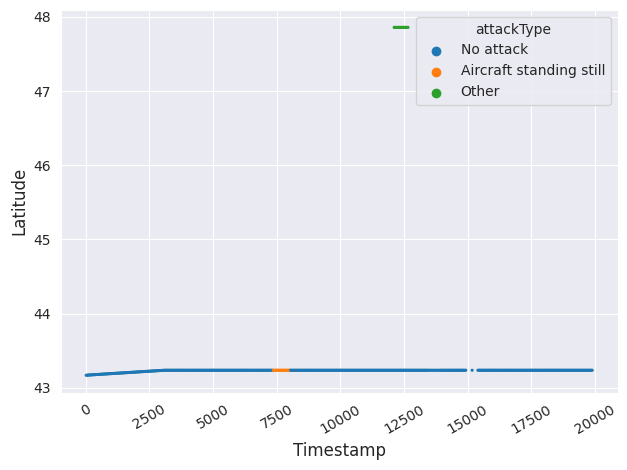

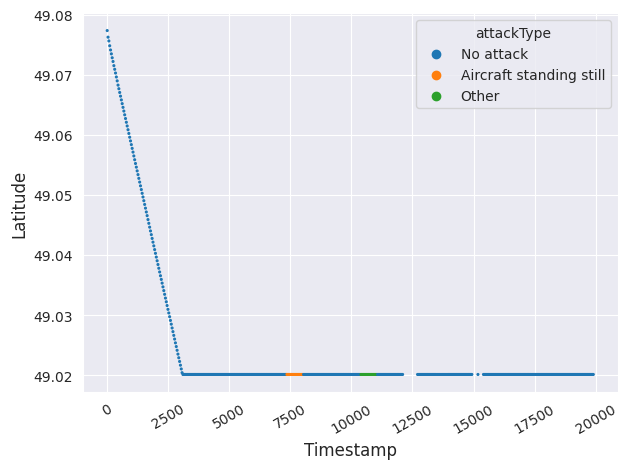

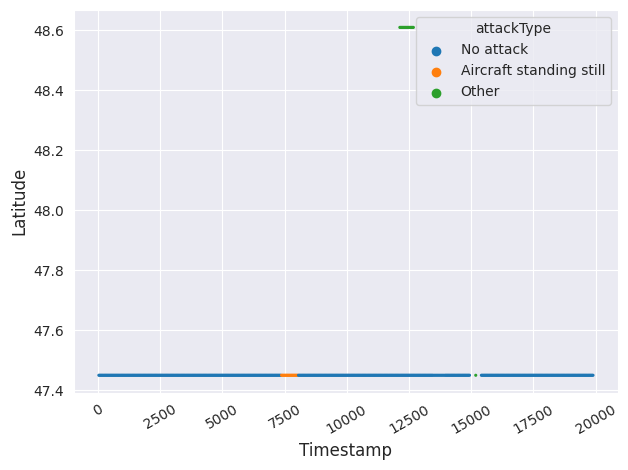

In [82]:
# nothing much to show here
attk = "Aircraft standing still"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="latitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Timestamp", fontsize=12)
    p.set_ylabel("Latitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Trajectory modification

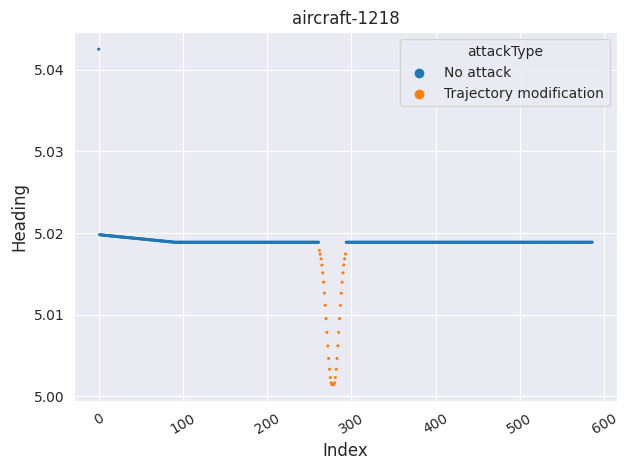

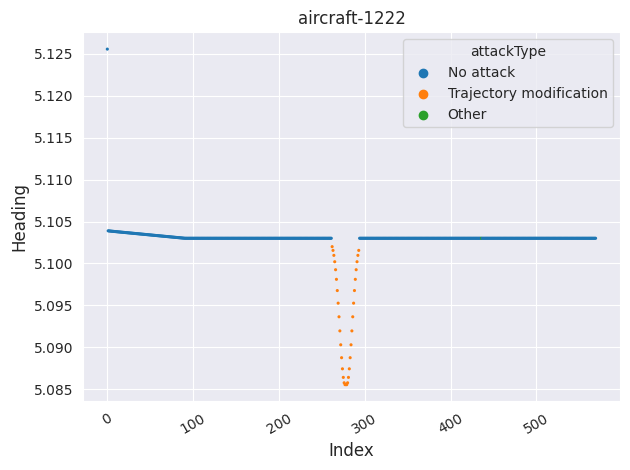

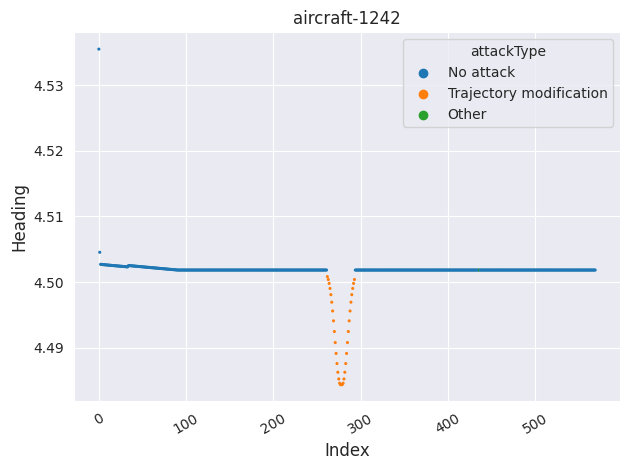

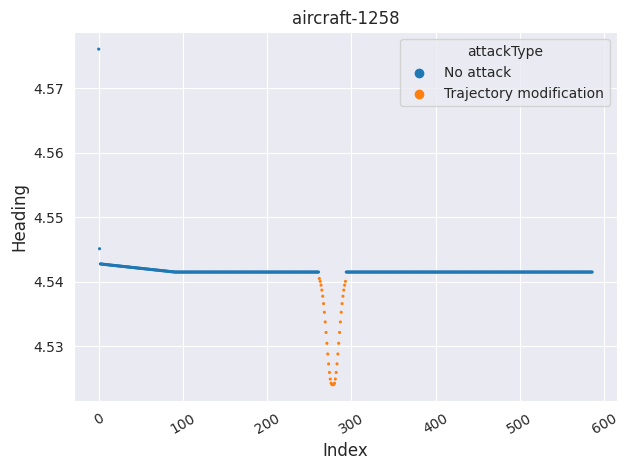

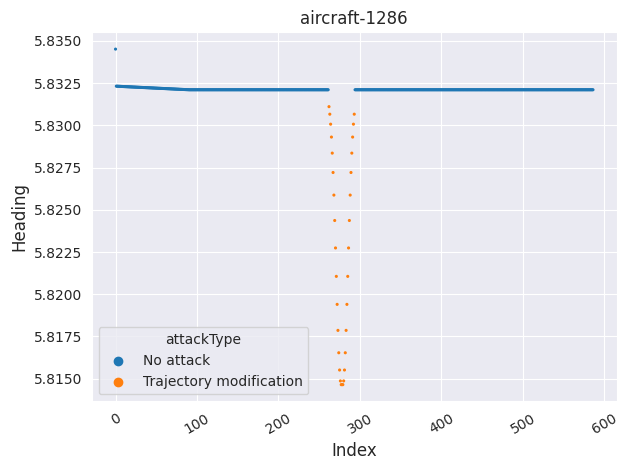

In [83]:
attk = "Trajectory modification"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub = sub.reset_index()
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="heading", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Index", fontsize=12)
    p.set_ylabel("Heading", fontsize=12)
    p.set_title(i)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Transponder code alteration

In [84]:
# not much to plot
attk = "Transponder code alteration"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    print (sub[['id', 'transponderCode']])
    print ("Different tansponder code: " + str(len(sub['transponderCode'].unique())))
    print ("**********")

                  id  transponderCode
0      aircraft-1210             5527
34     aircraft-1210             5527
68     aircraft-1210             5527
102    aircraft-1210             5527
136    aircraft-1210             5527
...              ...              ...
19728  aircraft-1210             5527
19762  aircraft-1210             5527
19796  aircraft-1210             5527
19830  aircraft-1210             5527
19864  aircraft-1210             5527

[570 rows x 2 columns]
Different tansponder code: 2
**********
                  id  transponderCode
6      aircraft-1234             2015
40     aircraft-1234             2015
74     aircraft-1234             2015
108    aircraft-1234             2015
142    aircraft-1234             2015
...              ...              ...
19734  aircraft-1234             2015
19768  aircraft-1234             2015
19802  aircraft-1234             2015
19836  aircraft-1234             2015
19870  aircraft-1234             2015

[570 rows x 2 columns]


Aircraft spoofing

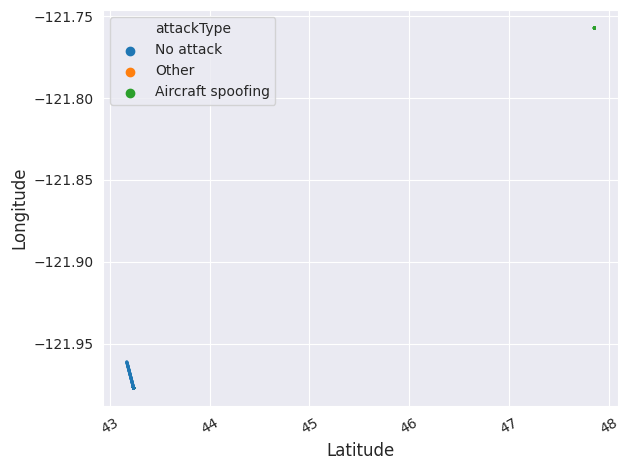

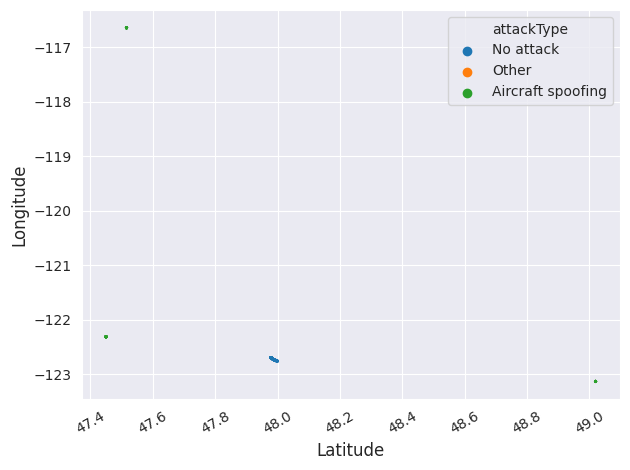

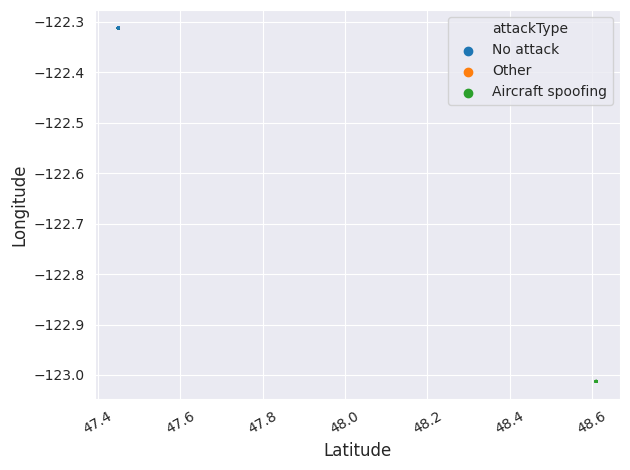

In [85]:
attk = "Aircraft spoofing"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x="latitude", y="longitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Latitude", fontsize=12)
    p.set_ylabel("Longitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Ghost injection

In [86]:
# not much to plot

attk = "Ghost injection"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub = sub.reset_index()
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x="index", y="heading", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Index", fontsize=12)
    p.set_ylabel("Heading", fontsize=12)
    p.set_title(i)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Message Delay

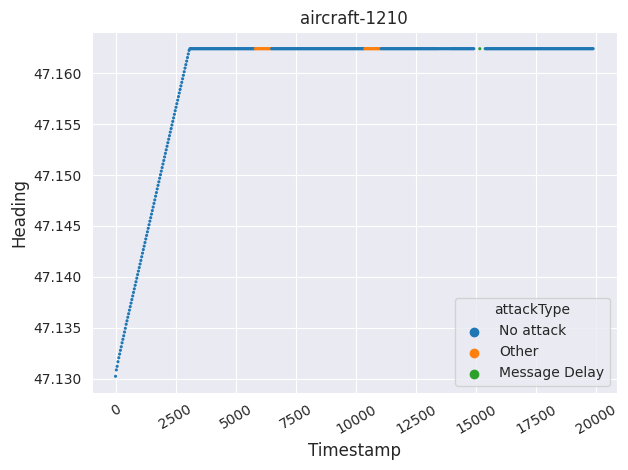

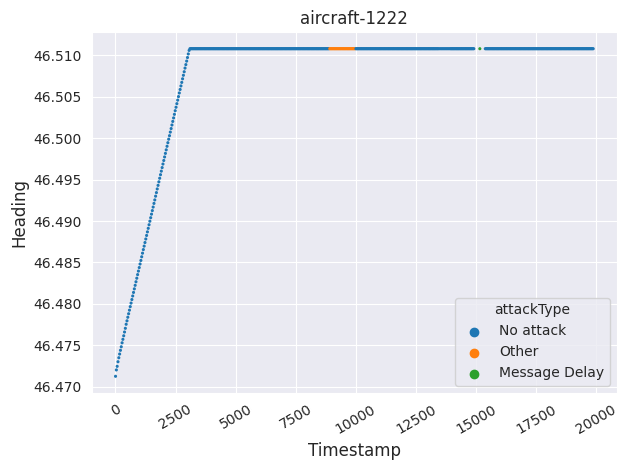

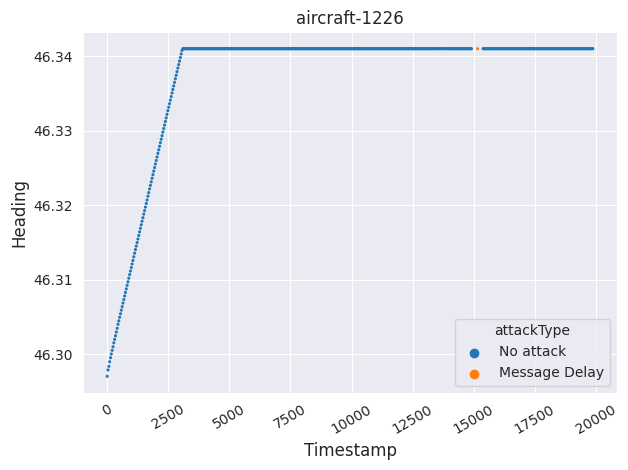

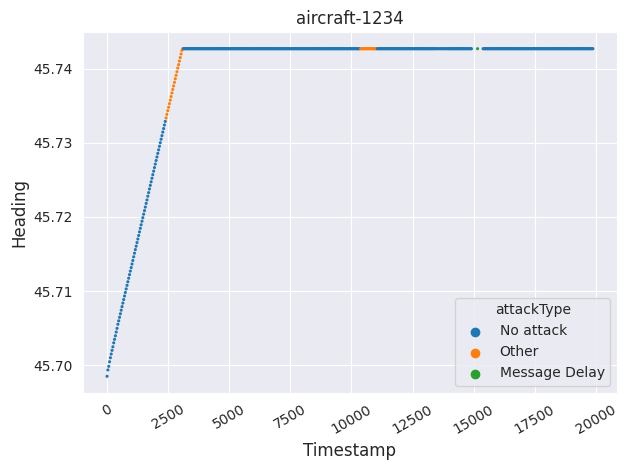

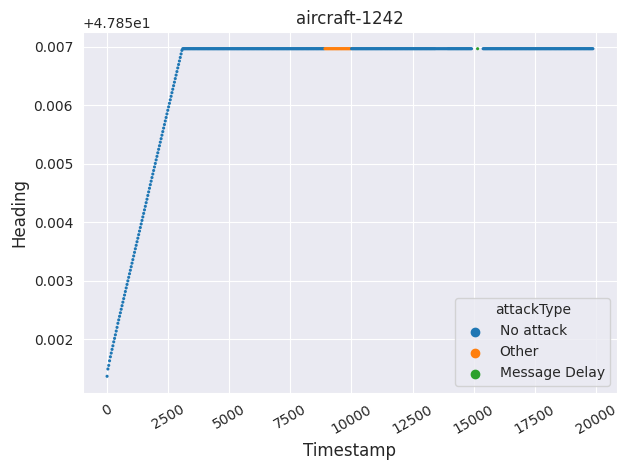

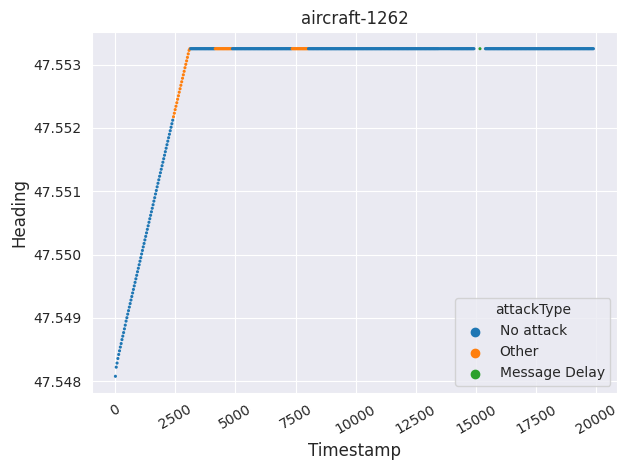

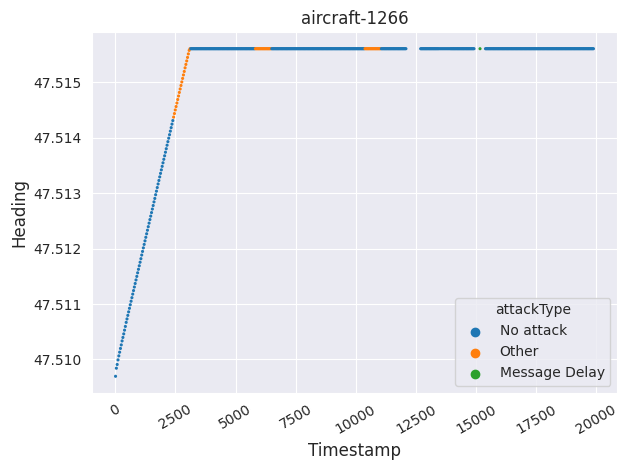

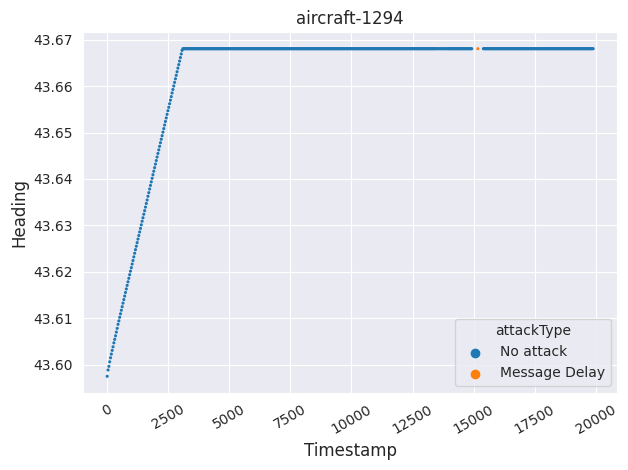

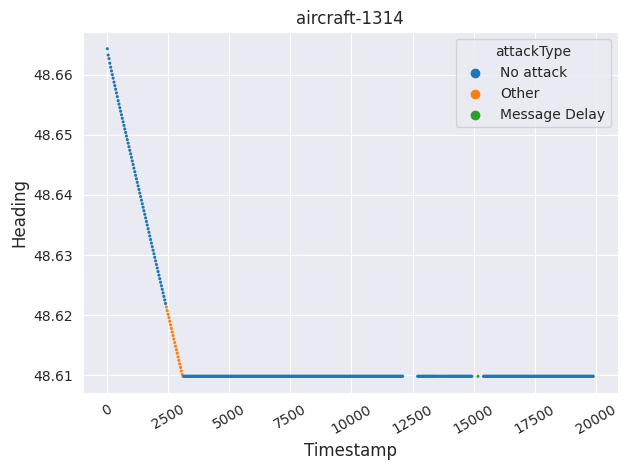

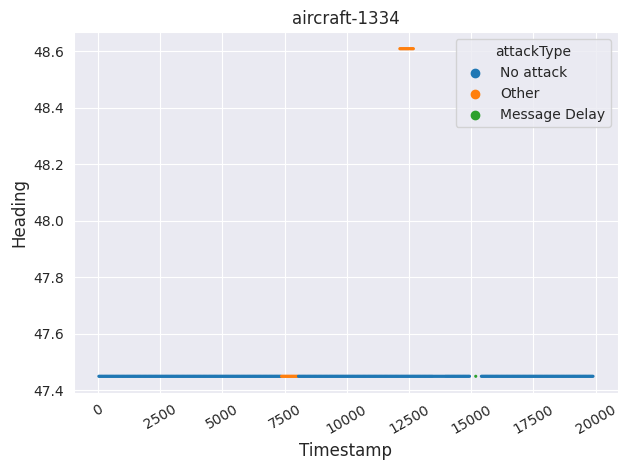

In [87]:
attk = "Message Delay"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="latitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Timestamp", fontsize=12)
    p.set_ylabel("Heading", fontsize=12)
    p.set_title(i)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Example of 3d plot

/tmp/ipykernel_18899/3302852815.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plot.tight_layout()


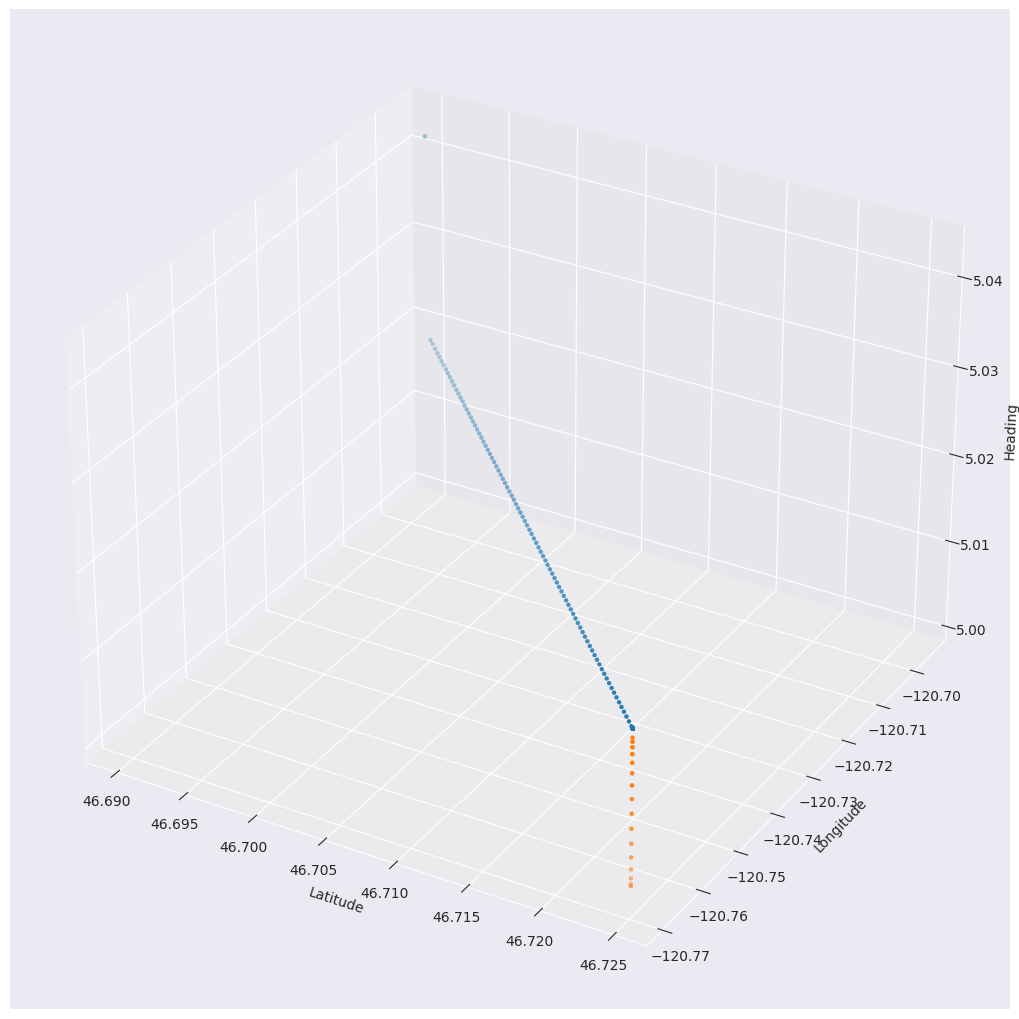

In [88]:
# example of trajectory modification

# extraction of the first aircraft affected
attk = "Trajectory modification"
id_trajectory_modification = df[df['attackType'] == "Trajectory modification"]['id'].unique().tolist()[0]
trajectory_modification = df[df['id'] == id_trajectory_modification]

x_legitim = trajectory_modification[trajectory_modification['attackType'] != attk]['latitude'] # and other attacks
y_legitim = trajectory_modification[trajectory_modification['attackType'] != attk]['longitude'] # and other attacks
z_legitim = trajectory_modification[trajectory_modification['attackType'] != attk]['heading'] # and other attacks

x_att = trajectory_modification[trajectory_modification['attackType'] == attk]['latitude']
y_att = trajectory_modification[trajectory_modification['attackType'] == attk]['longitude']
z_att = trajectory_modification[trajectory_modification['attackType'] == attk]['heading']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# keeps padding between figure elements

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter3D(x_legitim, y_legitim, z_legitim, s=10 , linewidth=0, label='No Attack')
ax.scatter3D(x_att, y_att, z_att, s=10 , linewidth=0, label='Trajectory modification' )

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Heading")

# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plot.tight_layout()
plot.show()